# Librerias

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Análisis de Datos

## Carga de Datos

In [49]:
df = pd.read_excel('prueba.xlsx')

## Tipo de Datos
Comprobamos que los formatos de los datos sean los correctos

In [50]:
df.dtypes

MARCA            object
MEDIOS           object
AÑO               int64
MES              object
Inversión       float64
Inv Estimada    float64
Segundos          int64
Avisos            int64
dtype: object

In [51]:
df['AÑO'] = pd.to_datetime(df['AÑO'], format='%Y')
# creamos la Variable diferencia para ver la distancia entre lo real y lo estimado
df['Diferencia'] = df['Inversión'] - df['Inv Estimada']

In [52]:
df

,MARCA,MEDIOS,AÑO,MES,Inversión,Inv Estimada,Segundos,Avisos,Diferencia
0,AKI SUPER DESPENSA Y GRAN AKI,Internet,2021-01-01,enero,32868.73,14044.354515,0,8835465,18824.375485
1,AKI SUPER DESPENSA Y GRAN AKI,Internet,2021-01-01,febrero,48253.66,22125.174813,0,14756855,26128.485187
2,AKI SUPER DESPENSA Y GRAN AKI,Internet,2021-01-01,marzo,38982.38,23274.685228,0,14298116,15707.694772
3,AKI SUPER DESPENSA Y GRAN AKI,Internet,2021-01-01,abril,42222.23,24351.695782,0,14542738,17870.534218
4,AKI SUPER DESPENSA Y GRAN AKI,Internet,2021-01-01,mayo,37028.04,15923.590545,0,9501259,21104.449455
...,...,...,...,...,...,...,...,...,...
1377,TU TIENDA ( CUENCA),VP,2023-01-01,enero,1125.00,501.930000,0,1,623.070000
1378,TU TIENDA ( CUENCA),VP,2023-01-01,febrero,2250.00,1003.860000,0,2,1246.140000
1379,TU TIENDA ( CUENCA),VP,2023-01-01,marzo,2250.00,1003.860000,0,2,1246.140000
1380,VEA,Internet,2022-01-01,junio,45.00,40.504050,0,30000,4.495950


In [53]:
df.dtypes

MARCA                   object
MEDIOS                  object
AÑO             datetime64[ns]
MES                     object
Inversión              float64
Inv Estimada           float64
Segundos                 int64
Avisos                   int64
Diferencia             float64
dtype: object

El tipo de Datos es el correcto
## Datos Nulos

In [54]:
df.isnull().sum()

MARCA           0
MEDIOS          0
AÑO             0
MES             0
Inversión       0
Inv Estimada    0
Segundos        0
Avisos          0
Diferencia      0
dtype: int64

No existen datos nulos

## Datos Duplicados

In [55]:
df.duplicated().sum()

0

No existen datos duplicados

# Análisis Estadístico

In [56]:
df.describe()


,AÑO,Inversión,Inv Estimada,Segundos,Avisos,Diferencia
count,1382,1.382000e+03,1382.000000,1382.000000,1.382000e+03,1.382000e+03
mean,2021-10-28 00:41:40.723589120,9.797357e+04,19275.303439,11917.417511,1.428010e+06,7.869826e+04
min,2021-01-01 00:00:00,5.000000e+00,2.203271,0.000000,1.000000e+00,0.000000e+00
25%,2021-01-01 00:00:00,3.546400e+03,1839.008520,0.000000,5.000000e+00,1.403347e+03
50%,2022-01-01 00:00:00,1.324863e+04,6627.559933,0.000000,5.400000e+01,5.546689e+03
75%,2022-01-01 00:00:00,5.222050e+04,20359.627421,2679.500000,4.088500e+03,2.758491e+04
max,2023-01-01 00:00:00,2.764860e+06,264341.474812,193590.000000,9.008903e+07,2.536670e+06
std,NaN,2.855238e+05,33225.930391,29767.258244,5.522363e+06,2.581720e+05



Inversión:

    - La inversión media es aproximadamente 97,973.57.
    - La inversión varía desde un mínimo de 5 hasta un máximo de 2,764,860.
    - Hay una gran variabilidad en la inversión, como lo indica la alta desviación estándar de 285,523.8, lo que sugiere que hay una dispersión considerable en los datos de inversión.

Inv Estimada:

    - La inversión estimada tiene un promedio de 19,275.30.
    - Existe una amplia gama de inversión estimada, desde 2.20 hasta 264,341.47.
    - De nuevo, hay una alta variabilidad en estos datos, indicada por la desviación estándar de 33,225.93.

Segundos:

    - En promedio, hay alrededor de 11,917.42 segundos de aviso.
    - Sin embargo, la mitad de los datos (mediana) tiene 0 segundos, lo que indica que hay muchos registros con 0 segundos y otros con valores mucho más altos.
    - El rango de segundos va desde 0 hasta 193,590.

Avisos:

    - La media es de alrededor de 1,428,010 avisos.
    - El rango de avisos va desde 1 hasta un impresionante 90,089,030, indicando que hay algunas campañas o marcas con una cantidad muy alta de avisos.

Diferencia:

    - La media de la diferencia es de 78,698.26.
    - El rango va desde 0 hasta 2,536,670. La alta variabilidad en esta columna se refleja en la desviación estándar de 258,172.
    Podemos observar que:

Por lo Tanto podemos concluir que 
- Existen un rango muy grande para las variables numéricas.
- Existe mucha dispersionen los datos.
- Hay datos Atípicos.

In [57]:
col_num=df.select_dtypes(include=['float','int']).columns.tolist()
eda_num=df[col_num]

In [58]:
eda_num.describe()

,Inversión,Inv Estimada,Segundos,Avisos,Diferencia
count,1.382000e+03,1382.000000,1382.000000,1.382000e+03,1.382000e+03
mean,9.797357e+04,19275.303439,11917.417511,1.428010e+06,7.869826e+04
std,2.855238e+05,33225.930391,29767.258244,5.522363e+06,2.581720e+05
min,5.000000e+00,2.203271,0.000000,1.000000e+00,0.000000e+00
25%,3.546400e+03,1839.008520,0.000000,5.000000e+00,1.403347e+03
50%,1.324863e+04,6627.559933,0.000000,5.400000e+01,5.546689e+03
75%,5.222050e+04,20359.627421,2679.500000,4.088500e+03,2.758491e+04
max,2.764860e+06,264341.474812,193590.000000,9.008903e+07,2.536670e+06


In [59]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 17))
axes = axes.flat
#sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
# columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
# columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(col_num):
    sns.histplot(
        data     = df[col_num],
        x        = colum,
        kde      = True,
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold")

- comprobamos que existen un rango muy grande de datos para las variables númericas

Text(0.5, 0.98, 'Box plot variables numéricas')

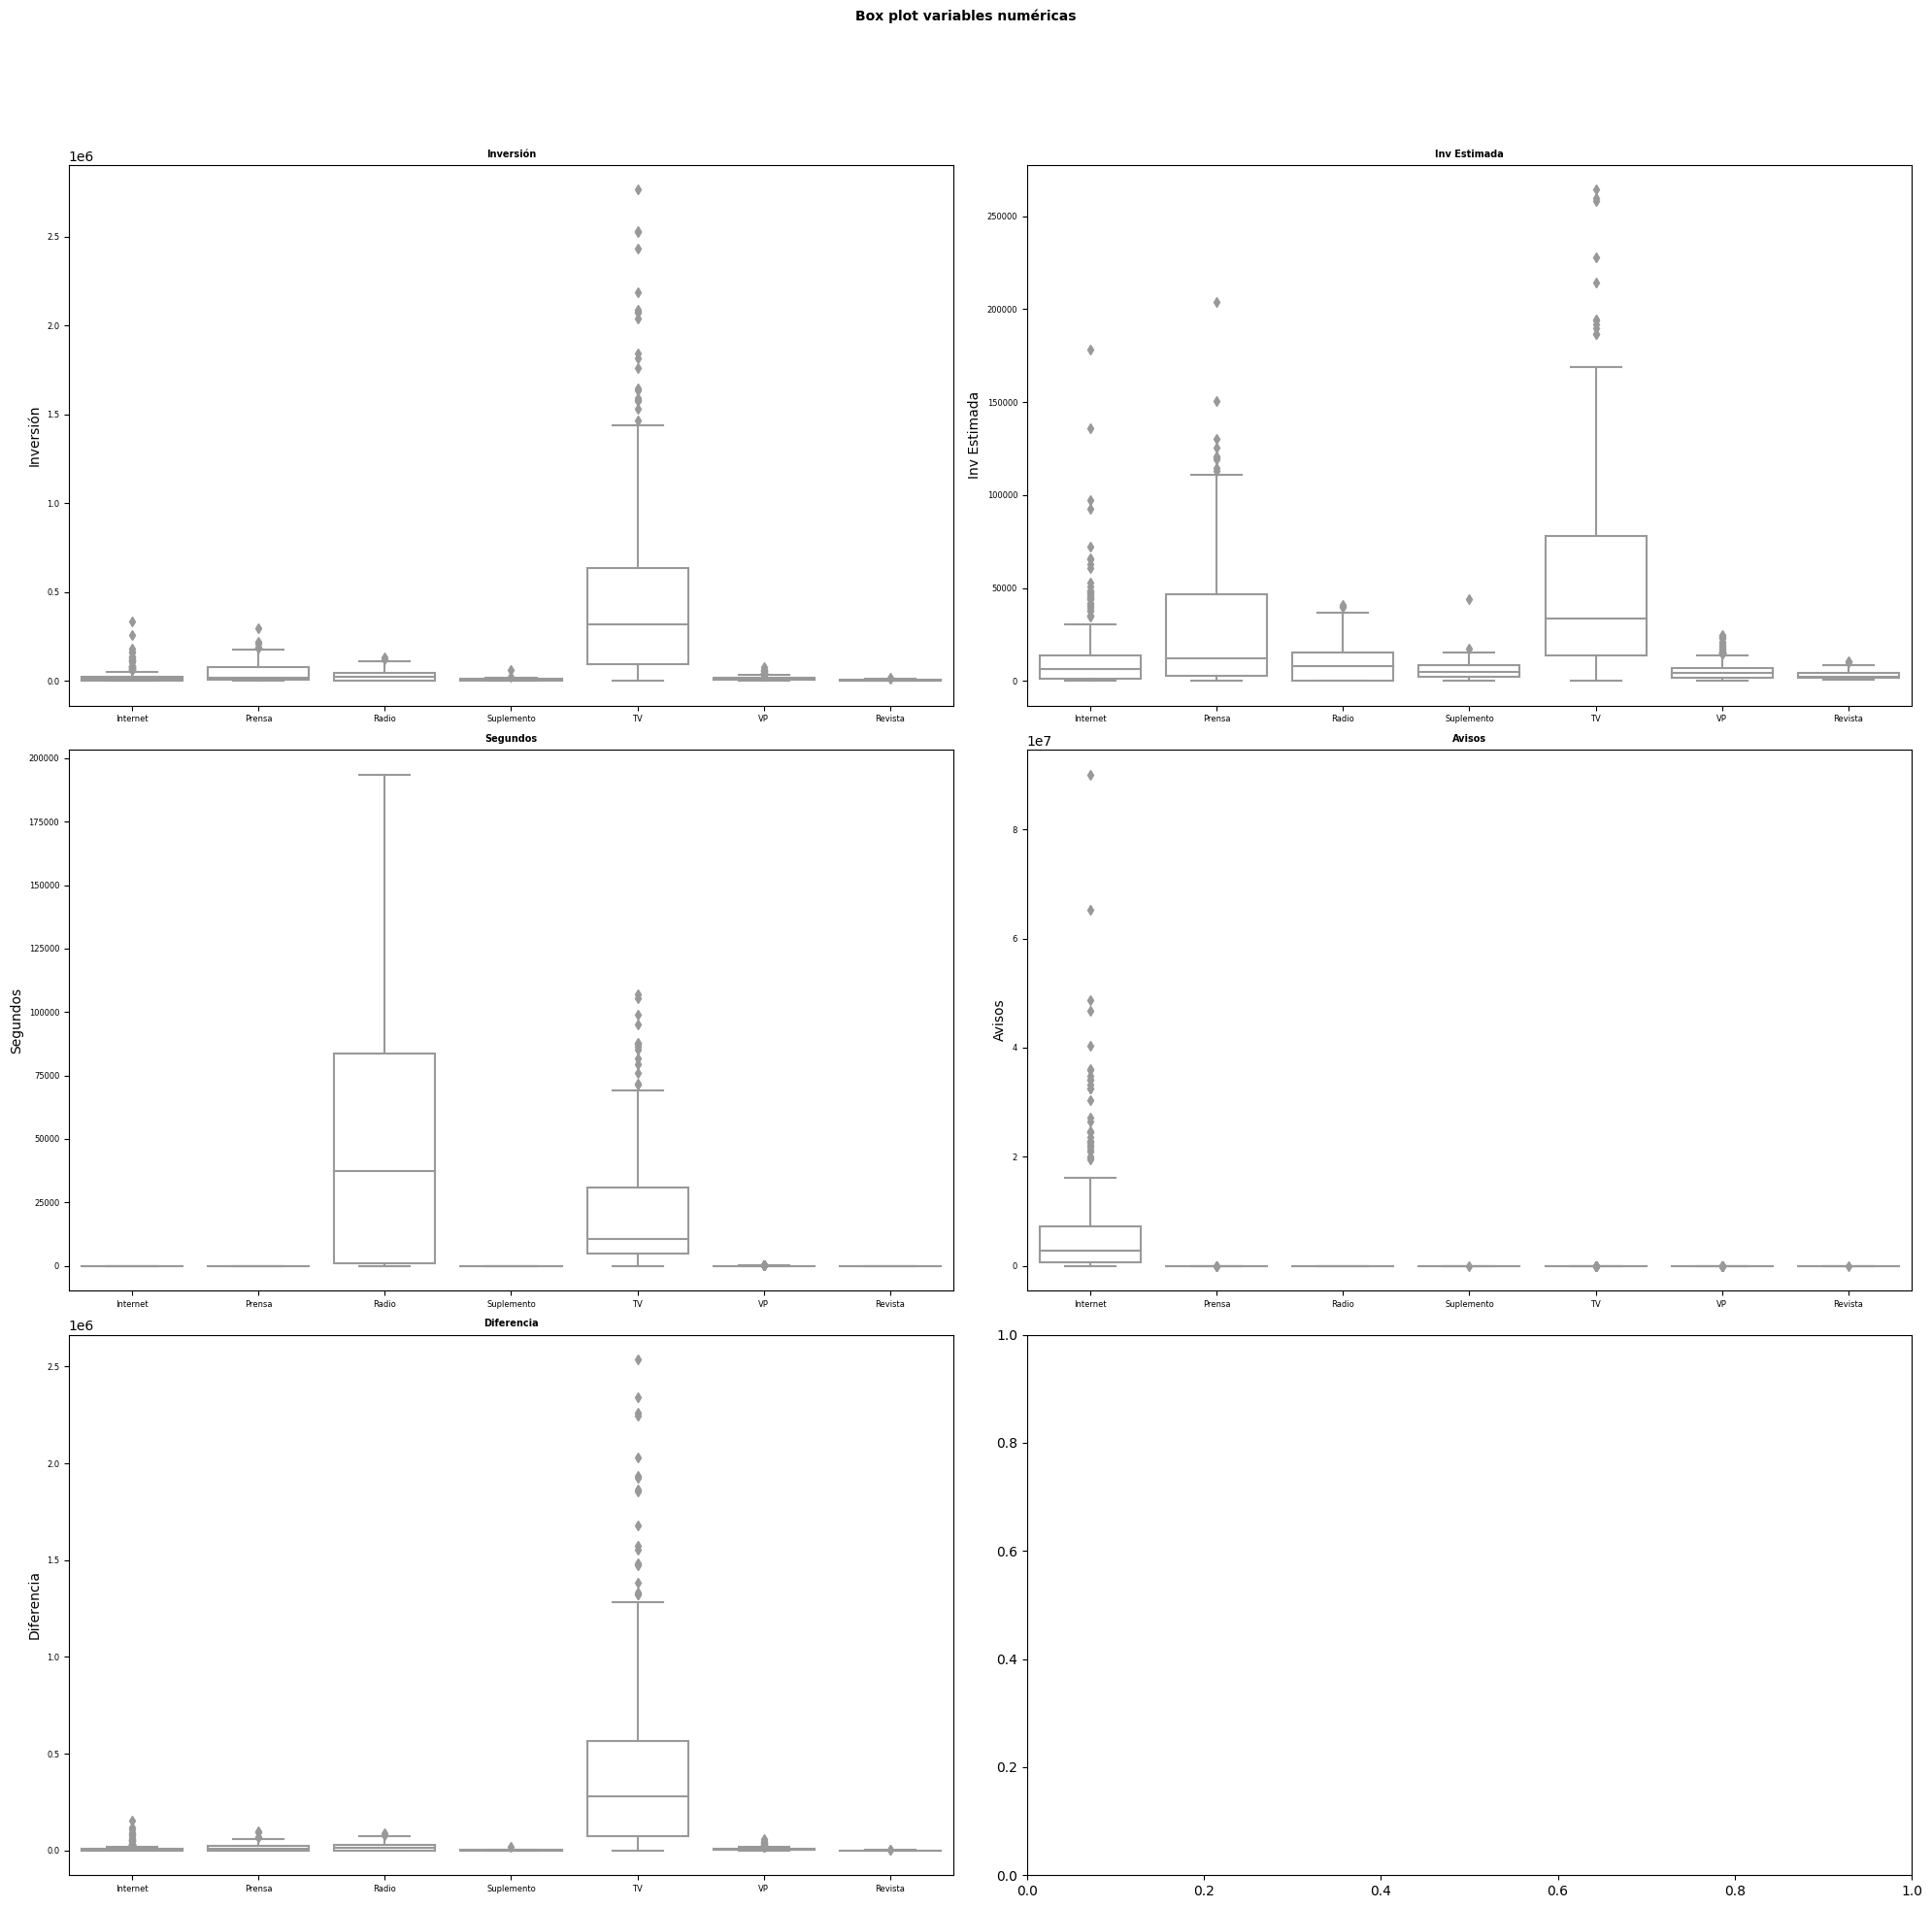

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flat
#sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")
# columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
# columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(col_num):
    sns.boxplot(
        data     = df[col_num+['MEDIOS']],
        x        = 'MEDIOS',
        y      = colum,
        color = "white",
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Box plot variables numéricas', fontsize = 10, fontweight = "bold")

- Analizamos por medio de comunicacion y encontramos que existen datos atípicos generalmente para Internet y TV, estos medios son en los que mayor difusión de publicidad existe y mayor inversión recibe, para realizar las campañas de publicidad.

## Correlación

<Axes: >

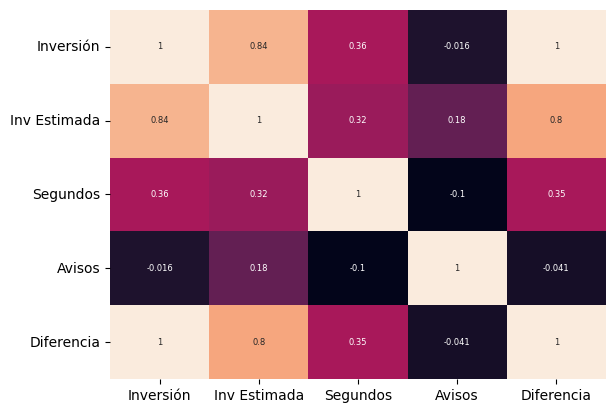

In [ ]:
eda_corr=eda_num.corr()
sns.heatmap(eda_corr, 
            annot=True,
            cbar=False,
            annot_kws = {"size": 6},
            # vmin      = -1,
            # vmax      = 1,
            # center    = 0
            )


- Existe una correlación fuerte positiva entre la Inversión y la Inversión estimada, entre más aumenta una la otra también aumentará.
- La relación entre inverión real y estimada es normal teniendo en cuenta que hay algunos factores que influyen en lo estimado.

# Clusterización

Utilizaremos la técnica de clustering, específicamente el método KMeans, para agrupar a las marcas en función de las variables proporcionadas. A través de este método, las marcas se agruparán en clústeres que tienen comportamientos similares en función de las variables.

In [ ]:
# Escojemos las variables
X_scaled = scale(eda_num[['Inversión','Inv Estimada', 'Segundos', 'Avisos']])

In [ ]:


# Modelo
# ==============================================================================
# Empezamos con 8 Clusters
modelo_kmeans = KMeans(n_clusters=8, n_init=25, random_state=35)
modelo_kmeans.fit(X=X_scaled)



c:\Users\JhonGlidden\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_init=25, random_state=35)

In [ ]:


# Scalamos las variables para realizar el clustering , además, existen datos atípicos y un rango muy grande
# ==============================================================================
y_predict = modelo_kmeans.predict(X=X_scaled)



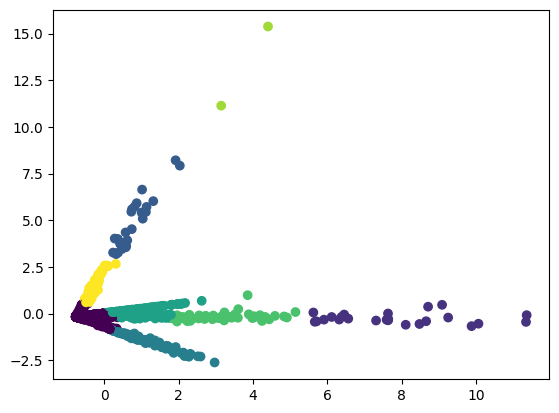

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_predict)
plt.show()

c:\Users\JhonGlidden\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\JhonGlidden\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\JhonGlidden\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\JhonGlidden\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:14

Text(0, 0.5, 'Intra-cluster (inertia)')

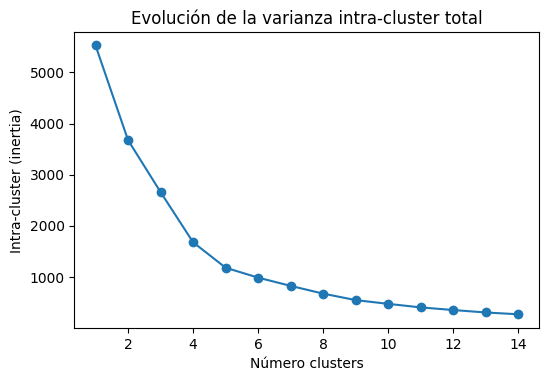

In [ ]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(X_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')

c:\Users\JhonGlidden\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\JhonGlidden\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\JhonGlidden\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\JhonGlidden\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:14

Text(0, 0.5, 'Media índices silhouette')

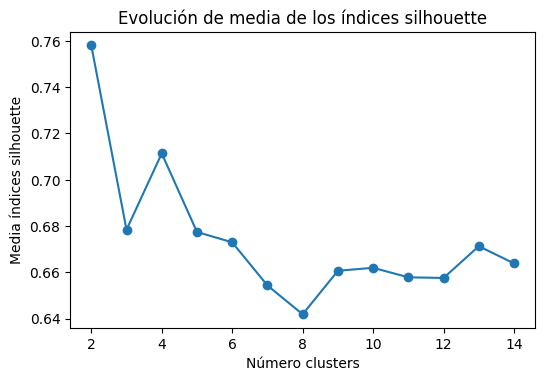

In [ ]:


# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')



A partir de 4 clusters la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que K = 4 es una buena opción.

# Creación del indice
Añadimos el mejor número de clusters para crear el índice 

In [ ]:
modelo_kmeans_final = KMeans(n_clusters=4, n_init=25, random_state=35)
modelo_kmeans_final.fit(X=X_scaled)


c:\Users\JhonGlidden\anaconda3\envs\pyml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=4, n_init=25, random_state=35)

In [ ]:
y_predict_final = modelo_kmeans_final.predict(X=X_scaled)

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_predict_final)
plt.show()

In [ ]:
df['Cluster'] = y_predict_final

# Descripción de cada grupo
for cluster in df['Cluster'].unique():
    print(f"Cluster {cluster}")
    print(df[df['Cluster'] == cluster][['Inversión','Inv Estimada', 'Segundos', 'Avisos']].describe())

Cluster 0
           Inversión   Inv Estimada      Segundos        Avisos
count    1203.000000    1203.000000   1203.000000  1.203000e+03
mean    47094.744706   12894.982556   3099.893599  8.285503e+05
std    106433.747516   20260.386605   9163.341638  2.342168e+06
min         5.000000       2.203271      0.000000  1.000000e+00
25%      2739.400000    1370.760254      0.000000  4.000000e+00
50%      9420.000000    5121.138733      0.000000  2.800000e+01
75%     31230.350000   13543.342258    102.000000  1.728000e+03
max    693813.400000  150608.331722  53356.000000  1.606244e+07
Cluster 3
           Inversión   Inv Estimada  Segundos        Avisos
count      31.000000      31.000000      31.0  3.100000e+01
mean   109479.614194   57722.365128       0.0  3.149347e+07
std     61611.911517   31007.639563       0.0  1.501902e+07
min     48611.610000   34761.060454       0.0  1.616684e+07
25%     71695.660000   41531.526095       0.0  2.249830e+07
50%     85269.710000   46856.864688       0.